# **Telia kodutöö**

# Loe mind!

**Kodutöö on tehtud nii, et selgitused peaksid olema piisavad inimestele baasteadmistega andmeteadusest. Kood on kommenteeritud ja samuti olen ka vahel kirjapildis nii öelda "mõtlenud valjult", et minu mõttekäik oleks arusaadav. Lõpuks kokkuvõttes räägin järeldustest ja tulemustest.**
<br>

**Kodutöö struktuur:**
1) **Andmete laadimine ja esmane uurimine**
2) **Andmete eeltöötlus**
3) **Puuduvad väärtused ja one-hot-encoding**
4) **Eksploratiivne andmeanalüüs**
5) **Treening ja testimise setide loomine, andmete standardiseerimine ja tasakaalustamine**
6) **Mudelite defineerimine, treenimine ja ennustuste tegemine**
7) **Mudelite Parameetrite tuunimine täiustamaks olemasolevaid mudeleid**
8) **Uute mudelite kasutamine täiendatud parameetritega**
9) **Kokkuvõte**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt 
import seaborn as sns


pd.set_option('display.max_columns', None)

## **Andmete laadimine ja esmane uurimine**

In [2]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv", sep= ",")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Annan veergudele nime ühe lausega, et mõista, mis veergudega meil üldse tegemist on.**

1) CustomerID - Kliendi identifikatsioon (Unique values: 7043)
2) Gender - Sugu (Binaarne Female/Male)
3) SeniorCitizen - Kas isik on pensionär või mitte (Binaarne 0/1)
4) Partner - Kas kliendil on ka partner (Binaarne yes/no)
5) Dependents - Kas kliendil on ülalpeetavaid (Binaarne yes/no)
6) Tenure - Kliendi staaž ettevõttes (kuudes(integer) Näiteks 10 = kümme kuud)
7) Phoneservice - Kas kliendil on telefoniteenus või mitte (binaarne yes/no)
8) Multiplelines - kas kliendil on mitu liini/telefoninr (yes/no)
9) InternetServce - Kliendi internetiteenuse tüüp (DSL / Fiber optic / no)
10) OnlineSecurity - Kas kliendil on internetiteenuse turvalisuse funktsioon (yes/no / No internet service)
11) OnlineBackup - Kas kliendil on andmed pilves/kuskil säilitatud (yes/no / No internet service)
12) DeviceProtection - Kas kliendil on seadmekindlustus - (yes/no / No internet service)
13) TechSupport - Kas kleindil on tehilise toe pakett (yes/no / No internet service)
14) StreamingTV - Kas kliendil on tellimus voogedastusteenusele (yes/no / No internet service)
15) StreamingMovies - Kas kliendil on filmide voogedstusteenus (yes / no / no internet service)
16) Contract - Kliendileping (Month-to-month / One year / Two year)
17) PaperlessBilling - Kas kliendil on elektroonilised arved (binaarne yes/no)
18) Paymentmethod - Kliendi maksmisviis (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
19) MonthlyCharges - Kliendi igakuine tasu teenusepakkujale (float 18.3 - 119)
20) TotalCharges - Kliendi kogusumma teenuste eest (18.8 - 8.68k)
21) Churn - Kas klient on lahkunud või mitte (binaarne yes/no)  #See on otsitav/ennustatav väärtus

In [4]:
data.shape #7043rida, 21 veergu

(7043, 21)

In [5]:
data.nunique() #Siin vaatan, et enamasti on veergudel binaarsed väärtused

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [6]:
data.isnull().sum() #NULL väärtused puuduvad

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
data.dtypes # Vaatan millised on andmetüübid

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
data["Churn"].value_counts()#Vaatan ennustatava muutuja väärtuseid. Tuleb täheldada, et "no" väärtused on 
                    #ülekaalus, ehk seda tuleb edaspidi arvestada. Esialgne idee on sünteesida korteeže
                    #(kasutades SMOTE'i), et vältida mudeli üle- ja alateenimist (bias & variance)


Churn
No     5174
Yes    1869
Name: count, dtype: int64

## **Andmete eeltöötlus**

In [9]:
original_data = data.copy(deep=True) # Koopia andmetest igaks juhuks


In [10]:
data.describe() # Arvuliste väärtuste summaarne tabel


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
object_columns = data.select_dtypes(include = ['object']).columns #Object andmete väärtuste analüüs 
for i in object_columns:
    print( data[i].value_counts())
    print("\t")

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
	
gender
Male      3555
Female    3488
Name: count, dtype: int64
	
Partner
No     3641
Yes    3402
Name: count, dtype: int64
	
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
	
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
	
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
	
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
	
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
	
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
	
DeviceProtection
No                     3095


In [12]:
def strip_whitespace(x): # Loon funktsiooni et eemaldada sõnedelt eest ja tagant whitespace ning
    if isinstance(x,str):                                                 #prindin muutuste arvu
        return x.strip()
    else:
        return x
data=data.applymap(strip_whitespace) #Kastuan funktsiooni andmetel

# Siin prindin muutuste arvu
if data is not original_data:
    data_all = pd.concat([original_data, data]).drop_duplicates()
    diff = data_all.shape[0] - data.shape[0]
    print("Difference: ", str(diff))

Difference:  11


C:\Users\robertis\AppData\Local\Temp\ipykernel_20168\3767038742.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data=data.applymap(strip_whitespace) #Kastuan funktsiooni andmetel


### **Puuduvad väärtused ja one-hot-encoding**

In [13]:
#data["TotalCharges"] = data["TotalCharges"].astype(float) 
#TotalCharges veerus 11 puuduvat väärtust, mistõttu ei saa seda stringist floatiks teha
(data[data['TotalCharges'] == '']) # Kokku on "TotalCharges" veerust 11 väärtust puudu

# Otsustan need väärtused eemaldada, sest 7000+ reast 11 rea eemaldamine ei oma suurt mõju resultaadile. 
#Samuti analüüsides veergude väärtuseid ei leia ma seoseid,miks just neil indiviidiel puudub 
                                                                #TotalCharges veerus väärtus.
data = data[data["TotalCharges"] != '']
data["TotalCharges"] = data["TotalCharges"].astype(float)# Teen TotalCharges veerud väärtused floatiks.

# Siin veergudele yes/no väärtustega kodeerin vastavlt 1 yes ja 0 no
# Otsustasin, et lahtrid kus on "No phone service" või "No internet service" kodeerida 
# samuti 0-ks, sest kui kliendil nii kui nii vastav teenus puudub siis see on "No" väärtusega

data.gender = data.gender.map(dict(Male=1, Female=0))
data.Partner = data.Partner.map(dict(Yes=1, No=0))
data.Dependents = data.Dependents.map(dict(Yes=1, No=0))
data.PhoneService = data.PhoneService.map(dict(Yes=1, No=0))
data.PaperlessBilling = data.PaperlessBilling.map(dict(Yes=1, No=0))
data.Churn = data.Churn.map(dict(Yes=1, No=0))
data_with_other = data #Loon koopia, kus on sees "No phone service" ja "No internet service" vajadusel kui soovin one-hot-encodida 
data.MultipleLines = data.MultipleLines.map({'Yes': 1, 'No': 0, 'No phone service': 0})
data.OnlineSecurity = data.OnlineSecurity.map({'Yes': 1, 'No': 0, 'No internet service': 0})
data.OnlineBackup = data.OnlineBackup.map({'Yes': 1, 'No': 0, 'No internet service': 0})
data.DeviceProtection = data.DeviceProtection.map({'Yes': 1, 'No': 0, 'No internet service': 0})
data.TechSupport = data.TechSupport.map({'Yes': 1, 'No': 0, 'No internet service': 0})
data.StreamingTV = data.StreamingTV.map({'Yes': 1, 'No': 0, 'No internet service': 0})
data.StreamingMovies = data.StreamingMovies.map({'Yes': 1, 'No': 0, 'No internet service': 0})
data 
# Kodeerisin "No phone service" ja "No internet service" ümber, et vähendada dimensionaalsust. 
#Algselt kasutasin kõige kodeerimiseks one-hot-encodingut, mis lõi juurde
# liigselt veerge mida saaks tegelikult lihtsalt nummerada vastavalt 1 ja 0. 
#Mida vähem veerge seda lihtsam ka andmetele peale vaadata.






,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,2234-XADUH,0,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,0,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [14]:
object_columns = data.select_dtypes(include = ['object']).columns # Siin eraldan kategoorilised veerud
df2  = data[object_columns]
df2= df2.drop("customerID", axis = 1) #Loon tabeli kategoorilistest veergudest

In [15]:
df2

,InternetService,Contract,PaymentMethod
0,DSL,Month-to-month,Electronic check
1,DSL,One year,Mailed check
2,DSL,Month-to-month,Mailed check
3,DSL,One year,Bank transfer (automatic)
4,Fiber optic,Month-to-month,Electronic check
...,...,...,...
7038,DSL,One year,Mailed check
7039,Fiber optic,One year,Credit card (automatic)
7040,DSL,Month-to-month,Electronic check
7041,Fiber optic,Month-to-month,Mailed check


In [16]:
df_encoded = pd.get_dummies(df2) # One-Hot-Encoding

In [17]:
#Loon uue andmetabeli kodeeritud väärtustega
data_dropped = data.drop(object_columns, axis=1) 
encoded_data = pd.concat([data["customerID"],data_dropped, df_encoded], axis=1)
encoded_data # Kodeeritud andmetabel

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,True,False,False,True,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,True,False,False,False,True,False,False,False,False,True
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,True,False,False,True,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,True,False,False,False,True,False,True,False,False,False
4,9237-HQITU,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,False,True,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,1,1,0,1,1,1,1,1,84.80,1990.50,0,True,False,False,False,True,False,False,False,False,True
7039,2234-XADUH,0,0,1,1,72,1,1,0,1,1,0,1,1,1,103.20,7362.90,0,False,True,False,False,True,False,False,True,False,False
7040,4801-JZAZL,0,0,1,1,11,0,0,1,0,0,0,0,0,1,29.60,346.45,0,True,False,False,True,False,False,False,False,True,False
7041,8361-LTMKD,1,1,1,0,4,1,1,0,0,0,0,0,0,1,74.40,306.60,1,False,True,False,True,False,False,False,False,False,True


### **Siit edasiseks on andmed kodeeritud ümber (one-hot-encoding)**

## **Eksploratiivne andmeanalüüs**

#### **Histogramm tõenäosuse tihedusfunktsiooniga Monthly Charges jaotusest**

C:\Users\robertis\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


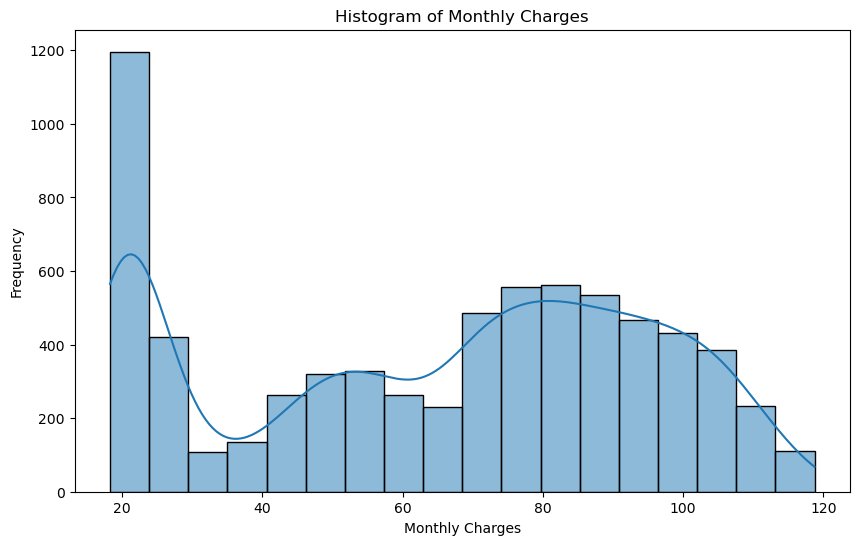

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data['MonthlyCharges'], kde=True)
plt.title('Histogram of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()


#### **Histogramm tõenäosuse tihedusfunktsiooniga Total Charges jaotusest**

C:\Users\robertis\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


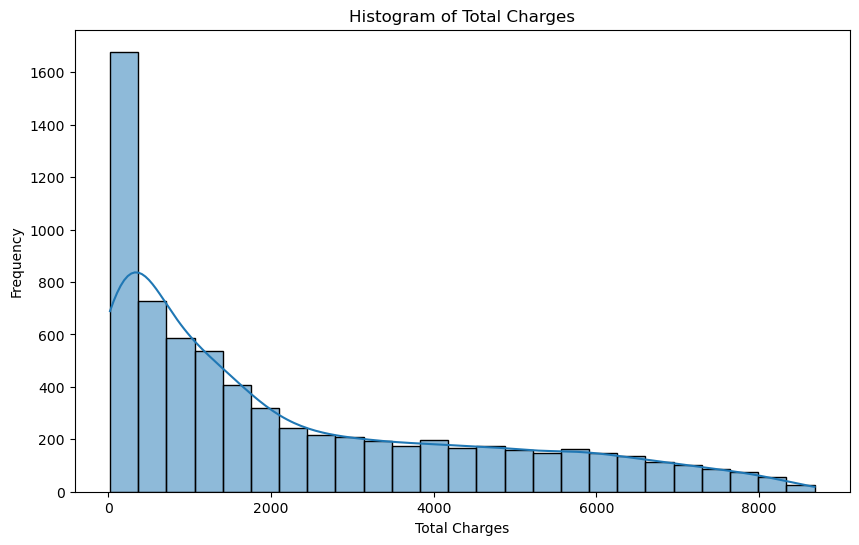

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data['TotalCharges'], kde=True)
plt.title('Histogram of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()


### **Korrelatsioonimaatriks ja heatmap**

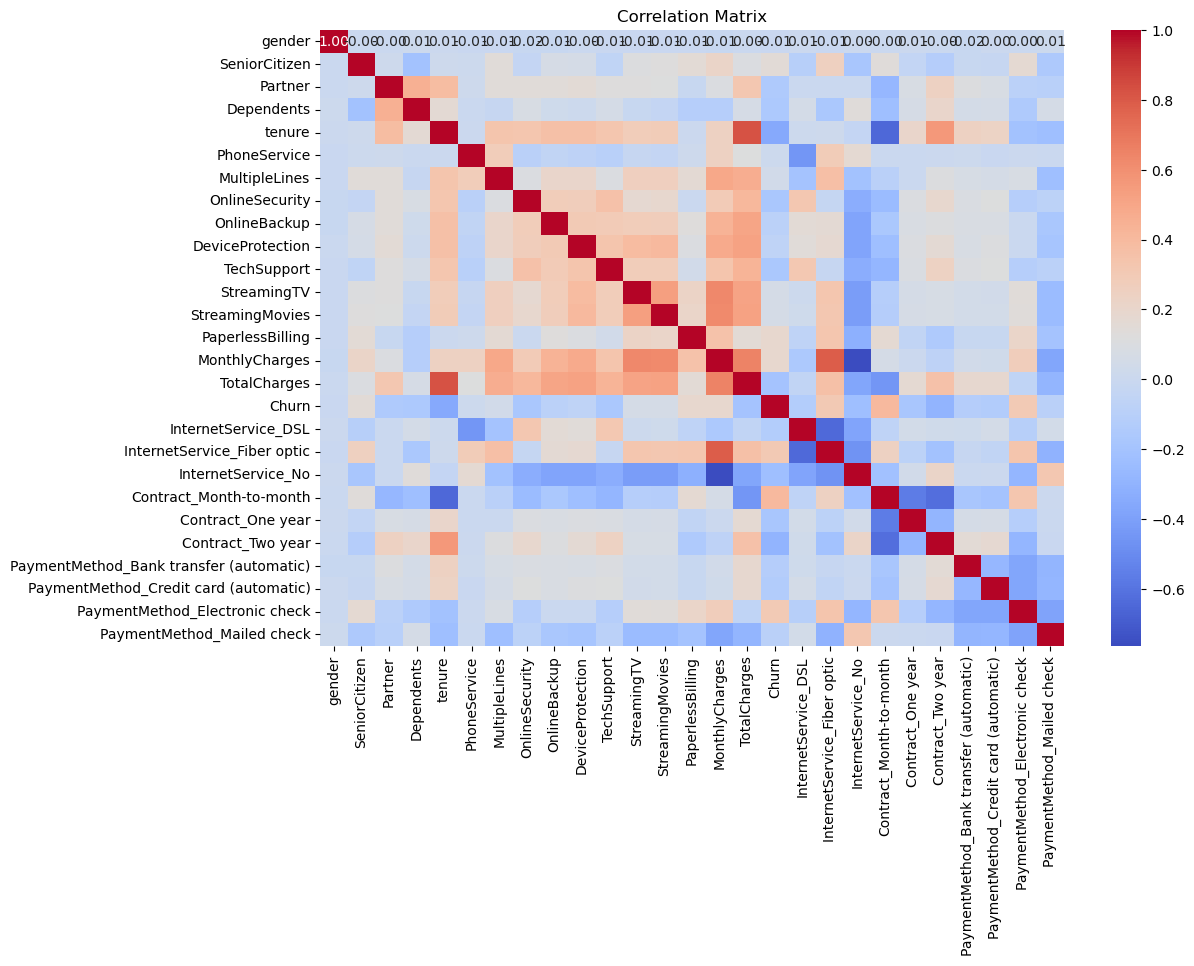

In [20]:
data_without_id = encoded_data.drop(['customerID'], axis=1) #Loon korrelatsioonimaatriksi
corr_matrix = data_without_id.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm') #Loon heatmapi
plt.title('Correlation Matrix')
plt.show()


In [21]:
corr_matrix #Siin korrelatsioonimaatriksi väärtused, mille ülevaate saab ka heatmapist

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.008883,-0.016328,-0.013093,-0.000807,-0.008507,-0.007124,-0.010105,-0.011902,-0.013779,0.000048,-0.008545,0.007584,-0.011189,0.004745,-0.003251,0.007755,-0.003603,-0.015973,0.001632,0.000844,0.013199
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.142996,-0.038576,0.066663,0.059514,-0.060577,0.105445,0.119842,0.156258,0.219874,0.102411,0.150541,-0.108276,0.254923,-0.182519,0.137752,-0.046491,-0.116205,-0.016235,-0.024359,0.171322,-0.152987
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142561,0.143346,0.141849,0.153556,0.120206,0.124483,0.118108,-0.013957,0.097825,0.319072,-0.149982,-0.001043,0.001235,-0.000286,-0.280202,0.083067,0.247334,0.111406,0.082327,-0.083207,-0.096948
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024307,0.080786,0.023639,0.013900,0.063053,-0.016499,-0.038375,-0.110131,-0.112343,0.064653,-0.163128,0.051593,-0.164101,0.138383,-0.229715,0.069222,0.201699,0.052369,0.061134,-0.149274,0.056448
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.332399,0.328297,0.361138,0.361520,0.325288,0.280264,0.285402,0.004823,0.246862,0.825880,-0.354049,0.013786,0.017930,-0.037529,-0.649346,0.202338,0.563801,0.243822,0.232800,-0.210197,-0.232181
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,0.279530,-0.091676,-0.052133,-0.070076,-0.095138,-0.021383,-0.033477,0.016696,0.248033,0.113008,0.011691,-0.452255,0.290183,0.171817,-0.001243,-0.003142,0.004442,0.008271,-0.006916,0.002747,-0.004463
MultipleLines,-0.008883,0.142996,0.142561,-0.024307,0.332399,0.279530,1.000000,0.098592,0.202228,0.201733,0.100421,0.257804,0.259194,0.163746,0.490912,0.469042,0.040033,-0.200318,0.366420,-0.210794,-0.088558,-0.003594,0.106618,0.075429,0.060319,0.083583,-0.227672
OnlineSecurity,-0.016328,-0.038576,0.143346,0.080786,0.328297,-0.091676,0.098592,1.000000,0.283285,0.274875,0.354458,0.175514,0.187426,-0.004051,0.296447,0.412619,-0.171270,0.320343,-0.030506,-0.332799,-0.246844,0.100658,0.191698,0.094366,0.115473,-0.112295,-0.079918
OnlineBackup,-0.013093,0.066663,0.141849,0.023639,0.361138,-0.052133,0.202228,0.283285,1.000000,0.303058,0.293705,0.281601,0.274523,0.127056,0.441529,0.510100,-0.082307,0.156765,0.165940,-0.380990,-0.164393,0.084113,0.111391,0.086942,0.090455,-0.000364,-0.174075
DeviceProtection,-0.000807,0.059514,0.153556,0.013900,0.361520,-0.070076,0.201733,0.274875,0.303058,1.000000,0.332850,0.389924,0.402309,0.104079,0.482607,0.522881,-0.066193,0.145150,0.176356,-0.380151,-0.225988,0.102911,0.165248,0.083047,0.111252,-0.003308,-0.187325


### **Kliendistaaži grupeerimine lühi-, kesk- ja pikaajalisteks perioodideks**<br>(See võib hiljem kasuks tulla kui hakkame mudeleid treenima, et saada parem resultaat)




In [22]:
def categorize_tenure(tenure): #Loon funktsiooni, mis kategoriseerib staaži lühikese, keskmise
    if tenure <= 12:           # ja pika staaži jrgi
        return 'Short-Term' # Staaž alla 12 kuu
    elif tenure <= 48:
        return 'Medium-Term' #Staaž 48 kuu ja 12kuu vahel
    else:
        return 'Long-Term' # Staaž üle 48 kuu
        
# Loon uue veeru "tenure_group" mille lisan hetkel data_without_id tabelisse, 
#et vajadusel hiljem lisada data_encoded tabelisse kui vaja

#Kasutan funktsiooni, et luua eelmainitud veerg tenure_group
data_without_id['tenure_group'] = data_without_id['tenure'].apply(categorize_tenure)


In [23]:
data_without_id #Siin näha uut loodud veergu

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,True,False,False,True,False,False,False,False,True,False,Short-Term
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,True,False,False,False,True,False,False,False,False,True,Medium-Term
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,True,False,False,True,False,False,False,False,False,True,Short-Term
3,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,True,False,False,False,True,False,True,False,False,False,Medium-Term
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,False,True,False,True,False,False,False,False,True,False,Short-Term
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,1,1,1,1,84.80,1990.50,0,True,False,False,False,True,False,False,False,False,True,Medium-Term
7039,0,0,1,1,72,1,1,0,1,1,0,1,1,1,103.20,7362.90,0,False,True,False,False,True,False,False,True,False,False,Long-Term
7040,0,0,1,1,11,0,0,1,0,0,0,0,0,1,29.60,346.45,0,True,False,False,True,False,False,False,False,True,False,Short-Term
7041,1,1,1,0,4,1,1,0,0,0,0,0,0,1,74.40,306.60,1,False,True,False,True,False,False,False,False,False,True,Short-Term


## **Loon staažigruppide raames graafikud lahkujates**


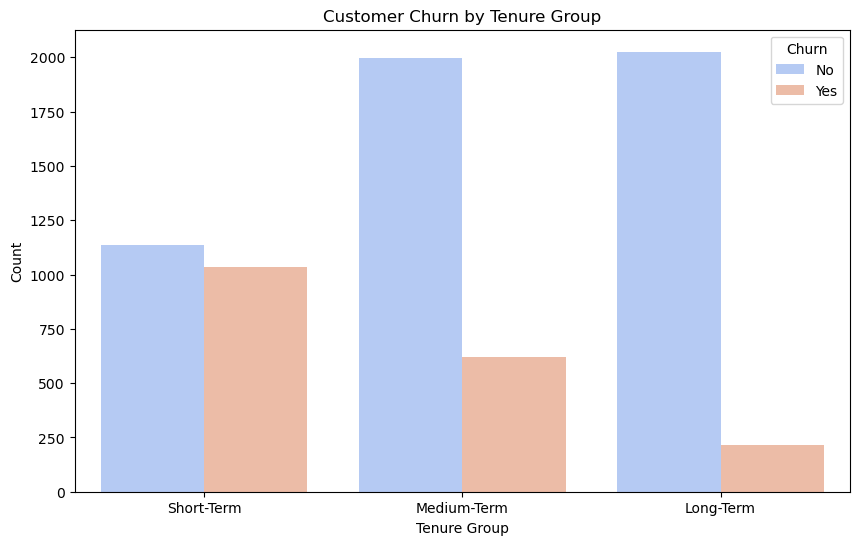

In [24]:
#Muudan siin binaarse integeri tagasi stringiks sest muidu seaborn ei lisa legendi
data_without_id['Churn'] = data_without_id['Churn'].map({1: 'Yes', 0: 'No'})
plt.figure(figsize=(10, 6))

 #Tulpdiagramm lahkunud ja püsivatest klientidest staažigruppide lõikes
sns.countplot(x='tenure_group', hue='Churn', data=data_without_id, palette='coolwarm')
plt.title('Customer Churn by Tenure Group')
plt.xlabel('Tenure Group')
plt.ylabel('Count')
plt.show()


### **Kliendilahkumise Proportsioonid Eri Staažigruppides**

<Figure size 1000x600 with 0 Axes>

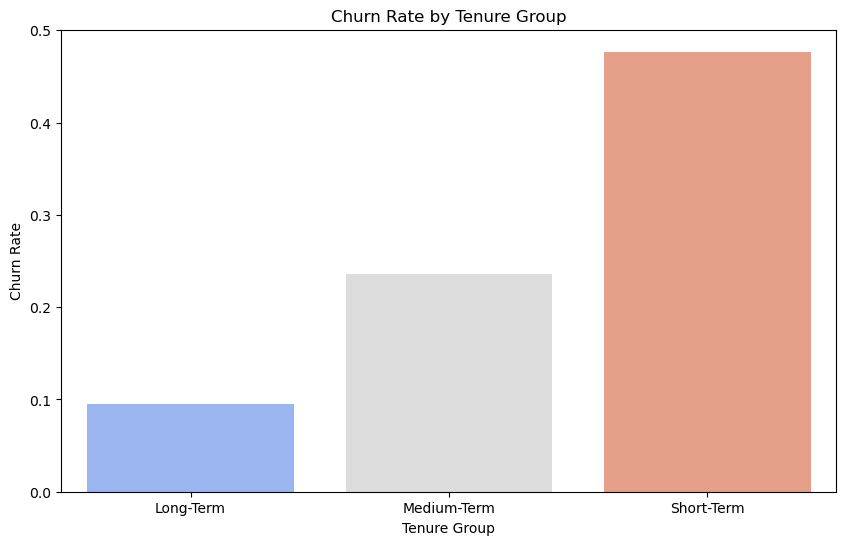

In [25]:
#Muudan siin staaži stringi väärtuse tagasi arvuliseks binaarseks väärtuseks
data_without_id['Churn'] = data_without_id['Churn'].map({'Yes':1 , 'No':0})
plt.figure(figsize=(10, 6))
#Lahkumise määr grupi kohta
churn_rate = data_without_id.groupby('tenure_group')['Churn'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='tenure_group', y='Churn', data=churn_rate, palette='coolwarm') #Loon graafiku
plt.title('Churn Rate by Tenure Group')
plt.xlabel('Tenure Group')
plt.ylabel('Churn Rate')
plt.show()


**Silmapaistvad tulemused:**

Analüüs toob esile huvitava mustri: lühiajalise staažiga klientide seas on kliendilahkumine märkimisväärselt kõrgem. See on loogiline, arvestades, et lojaalsemad kliendid on ettevõttega aja jooksul loonud tugevama vastastikuse suhte ja usalduse.
<br>

Lisaks on märgatav tugev seos "Tenure" (staaži) ja "TotalCharges" (kokkumakstud summa) vahel. See seos on ootuspärane, kuna pikema aja jooksul teenuseid tarbinud kliendid on ka rohkem maksnud.
<br>

Korrelatsioonimaatriksist on näha ka korrelatsiooni lahkujate ja järgnevate muutujate vahel: Paperless Billing, Monthly charges, Payment electronic check, Contract month to month, Total charges

## **One-Hot-Encoded andmetabel koos grupeeritud staažiga**

In [26]:
encoded2 = pd.get_dummies(data_without_id, columns=['tenure_group']) #Loon uue tabeli koos grupeeritud
                                                                     #staaži binaareste väärtustega
encoded2 # Seda tabelit katsetasin, aga ei teinud tulemust paremaks  

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Long-Term,tenure_group_Medium-Term,tenure_group_Short-Term
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,True,False,False,True,False,False,False,False,True,False,False,False,True
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,True,False,False,False,True,False,False,False,False,True,False,True,False
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,True,False,False,True,False,False,False,False,False,True,False,False,True
3,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,True,False,False,False,True,False,True,False,False,False,False,True,False
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,False,True,False,True,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,1,1,1,1,84.80,1990.50,0,True,False,False,False,True,False,False,False,False,True,False,True,False
7039,0,0,1,1,72,1,1,0,1,1,0,1,1,1,103.20,7362.90,0,False,True,False,False,True,False,False,True,False,False,True,False,False
7040,0,0,1,1,11,0,0,1,0,0,0,0,0,1,29.60,346.45,0,True,False,False,True,False,False,False,False,True,False,False,False,True
7041,1,1,1,0,4,1,1,0,0,0,0,0,0,1,74.40,306.60,1,False,True,False,True,False,False,False,False,False,True,False,False,True


## **Treening ja testimise setide loomine, andmete standardiseerimine ja tasakaalustamine**

In [27]:
X = encoded_data.drop(['customerID', 'Churn'], axis=1) #Kasutan tabelit kus ei ole staaž grupeeritud,
                                                    #sest testisin seda ja see ei teinud mudelit paremaks
y = encoded_data["Churn"] # Ennustatavad labelid ehk kliendi lahkumine

# Andmete jagamine treening- ja testandmeteks
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Andmete standardiseerimine
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE kasutamine tasakaalustamiseks treeningandmetes
smote = SMOTE(random_state=42)
X_train_scaled, y_train = smote.fit_resample(X_train_scaled, y_train)

#mitteaktiivsed koodijupid: Oversampler ja PCA:
#Kasutasin mõlemat nii eraldi kui kombineerides omavahel, et proovida mudeleid paremaks
# ja täpsemaks saada, aga tulemust see ei tõstnud. Proovisin sünteesida nii uusi vaatluseid
# ning samal ajal vähendada ka dimensionaalsust (eelkõige tuleneb One-Hot-Encodingust)
"""
oversampler = RandomOverSampler(random_state=42)
X_train_scaled, y_train = oversampler.fit_resample(X_train_scaled, y_train)

pca = PCA(random_state=42)
X_train_scaled = pca.fit_transform(X_train_scaled)
X_test_scaled = pca.transform(X_test_scaled)
"""


'\noversampler = RandomOverSampler(random_state=42)\nX_train_scaled, y_train = oversampler.fit_resample(X_train_scaled, y_train)\n\npca = PCA(random_state=42)\nX_train_scaled = pca.fit_transform(X_train_scaled)\nX_test_scaled = pca.transform(X_test_scaled)\n'

In [28]:
y_train.value_counts() # Siin tasakaalustatud labelite kontroll (peale SMOTE kasutamist)

Churn
1    4130
0    4130
Name: count, dtype: int64

### **Mudelite defineerimine, treenimine ja ennustuste tegemine**

In [29]:
# Individuaalsete mudelite defineerimine ja treenimine

#RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# KNeighborsClassifier
KNN = KNeighborsClassifier()

# SVC RBF
SVM_rbf = SVC(kernel="rbf", probability=True, random_state=42)

# SVC Polynomial
SVM_poly = SVC(kernel="poly", probability=True, random_state=42)

# SVC Linear kernel
SVM_linear = SVC(kernel="linear", probability=True, random_state=42)

# LogisticRegression                 
log_clf = LogisticRegression(random_state=42)

# Individuaalsete mudelite treenimine
mudelid = [rf, dt, KNN, SVM_rbf, SVM_poly, SVM_linear, log_clf] # List mudelitest
for mudel in mudelid:
    mudel.fit(X_train_scaled, y_train) # Treenime mudelid andmete peal

# Ennustuste genereerimine iga mudeli jaoks
y_pred_rf = rf.predict(X_test_scaled)
y_pred_dt = dt.predict(X_test_scaled)
y_pred_knn = KNN.predict(X_test_scaled)
y_pred_svm_rbf = SVM_rbf.predict(X_test_scaled)
y_pred_svm_poly = SVM_poly.predict(X_test_scaled)
y_pred_svm_linear = SVM_linear.predict(X_test_scaled)
y_pred_log_clf = log_clf.predict(X_test_scaled)


### **Loon mudelite hindamismõõdikutest tabeli, et oleks hea ülevaatus tulemustest**

In [30]:
# tehtud ennustuste sõnastik
predictions = {
    'RandomForest': y_pred_rf,
    'DecisionTree': y_pred_dt,
    'KNN': y_pred_knn,
    'SVM_rbf': y_pred_svm_rbf,
    'SVM_poly': y_pred_svm_poly,
    'SVM_linear': y_pred_svm_linear,
    'log_clf': y_pred_log_clf,
}
# Loon tühjad sõnastikud täpsuse, täpsuse, tundlikkuse ja AUC (area under the curve) mõõdikute jaoks

accuracy, precision, recall, auc = {}, {}, {}, {}

# Käin läbi ennustatud tulemused ja arvutan iga mudeli jaoks täpsuse, täpsuse, tundlikkuse ja AUC
for model_name, y_pred in predictions.items():
    accuracy[model_name] = accuracy_score(y_test, y_pred)
    precision[model_name] = precision_score(y_test, y_pred)
    recall[model_name] = recall_score(y_test, y_pred)
    auc[model_name] = roc_auc_score(y_test, y_pred)
    
# Loon DataFrame mudelite hindamiseks, kasutades täpsuse, täpsuse ja tundlikkuse mõõdikuid
df_model = pd.DataFrame(index=predictions.keys(), columns=['Accuracy', 'Precision', 'Recall']) # Mudelite dataframe'i loomine
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model["AUC"] = auc.values()

df_model.sort_values(by='AUC', ascending = False) # # Sorteerin DataFrame AUC skoori järgi kahanevalt

# Tehtud ennustuste sõnastik
predictions = {
    'RandomForest': y_pred_rf,
    'DecisionTree': y_pred_dt,
    'KNN': y_pred_knn,
    'SVM_rbf': y_pred_svm_rbf,
    'SVM_poly': y_pred_svm_poly,
    'SVM_linear': y_pred_svm_linear,
    'log_clf': y_pred_log_clf,
}

# Loon tühjad sõnastikud täpsuse, täpsuse, tundlikkuse ja AUC (area under the curve) mõõdikute jaoks
accuracy, precision, recall, auc = {}, {}, {}, {}

# Käin läbi ennustatud tulemused ja arvutan iga mudeli jaoks täpsuse, täpsuse, tundlikkuse ja AUC
for model_name, y_pred in predictions.items():
    accuracy[model_name] = accuracy_score(y_test, y_pred)
    precision[model_name] = precision_score(y_test, y_pred)
    recall[model_name] = recall_score(y_test, y_pred)
    auc[model_name] = roc_auc_score(y_test, y_pred)
    
# Loon DataFrame mudelite hindamiseks, kasutades täpsuse, täpsuse ja tundlikkuse mõõdikuid
df_model = pd.DataFrame(index=predictions.keys(), columns=['Accuracy', 'Precision', 'Recall']) # Mudelite dataframe'i loomine
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model["AUC"] = auc.values()

df_model.sort_values(by='AUC', ascending=False) # Sorteerin DataFrame AUC skoori järgi kahanevalt

,Accuracy,Precision,Recall,AUC
log_clf,0.736318,0.502513,0.802139,0.757313
SVM_rbf,0.759773,0.536290,0.711230,0.744289
SVM_linear,0.707889,0.471229,0.810160,0.740511
SVM_poly,0.732765,0.498208,0.743316,0.736130
RandomForest,0.769012,0.563969,0.577540,0.707938
KNN,0.692964,0.451342,0.719251,0.701349
DecisionTree,0.724236,0.483412,0.545455,0.667209


### **Loon tabeli Random Foresti mudeli poolt oluliseks peetud tunnused, et näha millised tunnused mängisid ennustamisel suuremat rolli**

In [31]:
feature_importances = rf.feature_importances_ #Tähtsad tunnused
importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances}) #Dataframe tunnustest koos osakaaluga
importances_df = importances_df.sort_values(by='Importance', ascending=False) # Tunnuste olulisuse tabel järjestatud kahanevalt
importances_df

,Feature,Importance
4,tenure,0.134377
14,MonthlyCharges,0.132149
15,TotalCharges,0.128672
19,Contract_Month-to-month,0.106338
17,InternetService_Fiber optic,0.039897
21,Contract_Two year,0.038100
13,PaperlessBilling,0.035351
7,OnlineSecurity,0.034384
10,TechSupport,0.032921
0,gender,0.030335


### **Mudelite Parameetrite tuunimine täiustamaks olemasolevaid mudeleid** (GridSearch)

In [32]:
# Defineerin hüperparameetrite otsingu alad igale mudelile

# Random Forest Classifier'i hüperparameetrid
param_grid_rf = {
    'n_estimators': [50, 100, 150], # "n_estimators" määrab puude arvu metsas.
    'max_depth': [None, 10, 20], # "max_depth" määrab puu maksimaalse sügavuse. None tähendab piiramatut sügavust.
    'min_samples_split': [2, 5, 10] # "min_samples_split" määrab minimaalse hulga näidiseid, mis on vajalik sõlme jagamiseks.
}

# Decision Tree Classifier'i hüperparameetrid
param_grid_dt = {
    'max_depth': [None, 10, 20], # Sama, mis Random Forest'is, määrab puu maksimaalse sügavuse.
    'min_samples_split': [2, 5, 10] # Sama, mis Random Forest'is, määrab minimaalse hulga näidiseid sõlme jagamiseks.
}

# K-Nearest Neighbors Classifier'i hüperparameetrid
param_grid_knn = {
    'n_neighbors': [3, 5, 7] # "n_neighbors" määrab naabrite arvu, mida kasutatakse klassifitseerimisel.
}

# Support Vector Machine'i hüperparameetrid
param_grid_svm = {
    'C': [0.1, 1, 10], # "C" on regulatsiooniparameeter, mis määrab mudeli keerukuse piiramise tugevuse.
    'gamma': [0.1, 0.01, 0.001], # "gamma" määrab üksikute treeningnäidiste mõju ulatuse.
    'kernel': ['rbf', 'poly', 'linear'] # "kernel" määrab kasutatava tuuma (kernel) tüübi.
}

# Logistic Regression'i hüperparameetrid
param_grid_log_clf = {
    'C': [0.1, 1, 10] # Sama, mis SVM'is, regulatsiooniparameeter, mis määrab mudeli keerukuse piiramise tugevuse.
}


# Defineerin Grid Search'i iga mudeli jaoks
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5)
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_search_svm = GridSearchCV(SVC(probability=True, random_state=42), param_grid_svm, cv=5)
grid_search_log_clf = GridSearchCV(LogisticRegression(random_state=42), param_grid_log_clf, cv=5)

# Treenin Grid Search mudelid
grid_search_rf.fit(X_train_scaled, y_train)
grid_search_dt.fit(X_train_scaled, y_train)
grid_search_knn.fit(X_train_scaled, y_train)
grid_search_svm.fit(X_train_scaled, y_train)
grid_search_log_clf.fit(X_train_scaled, y_train)

# Väljastan parimad hüperparameetrid ja skoorid iga mudeli jaoks
print("RandomForestClassifier:")
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Score:", grid_search_rf.best_score_)

print("DecisionTreeClassifier:")
print("Best Parameters:", grid_search_dt.best_params_)
print("Best Score:", grid_search_dt.best_score_)

print("KNeighborsClassifier:")
print("Best Parameters:", grid_search_knn.best_params_)
print("Best Score:", grid_search_knn.best_score_)

print("SVC:")
print("Best Parameters:", grid_search_svm.best_params_)
print("Best Score:", grid_search_svm.best_score_)

print("LogisticRegression:")
print("Best Parameters:", grid_search_log_clf.best_params_)
print("Best Score:", grid_search_log_clf.best_score_)


RandomForestClassifier:
Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.8558111380145277
DecisionTreeClassifier:
Best Parameters: {'max_depth': 10, 'min_samples_split': 2}
Best Score: 0.7929782082324455
KNeighborsClassifier:
Best Parameters: {'n_neighbors': 3}
Best Score: 0.8037530266343825
SVC:
Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best Score: 0.8602905569007264
LogisticRegression:
Best Parameters: {'C': 1}
Best Score: 0.7720338983050847


### **Uute mudelite kasutamine täiendatud parameetritega** (Siin on sama kood mis eelevalt mudelite treenimiseks kasutasin)

In [33]:
# Individuaalsete mudelite defineerimine ja treenimine - Uute parameetritega

#RandomForestClassifier
rf_2 = RandomForestClassifier(random_state=42, class_weight='balanced', max_depth=20, min_samples_split=2, n_estimators=100)

# DecisionTreeClassifier
dt_2 = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=2)

# KNeighborsClassifie
KNN_2 = KNeighborsClassifier(n_neighbors=3)

# SVC RBF
SVM_rbf_2 = SVC(kernel="rbf", probability=True, random_state=42, C=10, gamma=0.1)

# SVC Polynomial 
SVM_poly_2 = SVC(kernel="poly", probability=True, random_state=42, C=10, gamma=0.1)

# SVC Linear kernel
SVM_linear_2 = SVC(kernel="linear", probability=True, random_state=42, C=10)

# LogisticRegression
log_clf_2 = LogisticRegression(random_state=42, C=1, max_iter=50)


# Individuaalsete mudelite treenimine
mudelid2 = [rf_2, dt_2, KNN_2, SVM_rbf_2, SVM_poly_2, SVM_linear_2, log_clf_2] #List mudelitest
for mudel in mudelid2:
    mudel.fit(X_train_scaled, y_train) # Treenime mudelid andmete peal

# Ennustuste genereerimine iga mudeli jaoks
y_pred_rf_2 = rf_2.predict(X_test_scaled)
y_pred_dt_2 = dt_2.predict(X_test_scaled)
y_pred_knn_2 = KNN_2.predict(X_test_scaled)
y_pred_svm_rbf_2 = SVM_rbf_2.predict(X_test_scaled)
y_pred_svm_poly_2 = SVM_poly_2.predict(X_test_scaled)
y_pred_svm_linear_2 = SVM_linear_2.predict(X_test_scaled)
y_pred_log_clf_2 = log_clf_2.predict(X_test_scaled)


# Ennustuste sõnastik tuunitud parameetritega
predictions2 = {
    'RandomForest_2': y_pred_rf_2,
    'DecisionTree_2': y_pred_dt_2,
    'KNN_2': y_pred_knn_2,
    'SVM_rbf_2': y_pred_svm_rbf_2,
    'SVM_poly_2': y_pred_svm_poly_2,
    'SVM_linear_2': y_pred_svm_linear_2,
    'log_clf_2': y_pred_log_clf_2,
}

accuracy2, precision2, recall2, auc2 = {}, {}, {}, {}

for model_name, y_pred in predictions2.items():
    accuracy2[model_name] = accuracy_score(y_test, y_pred)
    precision2[model_name] = precision_score(y_test, y_pred)
    recall2[model_name] = recall_score(y_test, y_pred)
    auc2[model_name] = roc_auc_score(y_test, y_pred)

df_model2 = pd.DataFrame(index=predictions2.keys(), columns=['Accuracy', 'Precision', 'Recall']) # Mudelite dataframe'i tuunitud parameetritega
df_model2['Accuracy'] = accuracy2.values()
df_model2['Precision'] = precision2.values()
df_model2['Recall'] = recall2.values()
df_model2["AUC"] = auc2.values()

df_model2.sort_values(by='AUC', ascending = False) # Mudelite hindamismõõdikute dataframe sorteeritud AUC skoori järgi


,Accuracy,Precision,Recall,AUC
log_clf_2,0.736318,0.502513,0.802139,0.757313
SVM_linear_2,0.709311,0.472699,0.810160,0.741479
RandomForest_2,0.773276,0.568922,0.606952,0.720223
DecisionTree_2,0.715707,0.475096,0.663102,0.698927
KNN_2,0.698650,0.454874,0.673797,0.690722
SVM_poly_2,0.709311,0.464213,0.606952,0.676661
SVM_rbf_2,0.730633,0.494090,0.558824,0.675830


## **Kokkuvõte - Mudelid**

Mudelite rakendamine sõltub konkreetsest eesmärgist, mida eelistatakse ja mis on antud kontekstis oluline.
<br>

Isiklukult arvan, et kuna me ennustame kliente, kes lahkuvad, siis eelistaksin mudelitest enim log_clf_2 mudelit (logistilise regressioonimudelit), sest sellel mudelil on kõrge recall ja AUC, ehk see mudel suudab tuvastada kõige efektiivsemalt lahkuvaid kliente.
<br>

Leian, et FP tulemuste suurenemine ei ole just kõige hullem, sest ettevõtte kasumlikkuse, hea teenuse pakkumise ja eelkõige kliendirahulolu säilitamine on lõppkokkuvõttes tähtsamad.
<br>

Samuti AUC väärtus aitab eristada lahkuvaid ja mittelahkuvaid kliente, mis on kasulik kliendikäitumise ennustamiseks.

## **Kokkuvõte - Olulised tunnused**

**Random Foresti poolt oluliseks peetud top10 tunnust**

In [34]:
importances_df.head(10) 

,Feature,Importance
4,tenure,0.134377
14,MonthlyCharges,0.132149
15,TotalCharges,0.128672
19,Contract_Month-to-month,0.106338
17,InternetService_Fiber optic,0.039897
21,Contract_Two year,0.038100
13,PaperlessBilling,0.035351
7,OnlineSecurity,0.034384
10,TechSupport,0.032921
0,gender,0.030335


Siin on näha samu tunnuseid nagu ka korrelatsioonimaatriksis tunnuste ja lahkujate vahel nagu näiteks: tenure, Paperless Billing, Monthly charges,  Contract month to month, Total chrages, InternetService_Fiber optic.
<br>

Mõistes neid suundumusi, saab ettevõte kohandada oma strateegiaid, et vähendada klientide lahkumist ja parandada üldist kliendikogemust. Näiteks võiks ettevõtte klientide lojaalsuse suurendamiseks pakkuda paindlikumaid lepingutingimusi ja konkurentsivõimelisi hindu. 
<br>

Oluline on ka kiire interneti pakkumine ja proovida ka siduda klientidega pikaajlisemaid lepinguid, et vähendada lahkumise tõenäosust. Lisaks võib ettevõte kaaluda personaalsemate ja väärtuspõhiste pakkumiste tegemist, mis põhinevad kliendi varasemal kasutusajalool ja eelistustel, et tõsta rahulolu ja lojaalsust. Tehnoloogiliste uuenduste ja klienditoe parandamine, eriti tehnilise toe ja klienditeeninduse valdkonnas, aitab samuti tugevdada kliendi usaldust ja rahulolu. 